In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data_df = pd.read_csv('../data/coffee_menu.csv')

In [8]:
data_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [12]:
data_df.groupby('Beverage_category')['Beverage'].count()

Beverage_category
Classic Espresso Drinks              58
Coffee                                4
Frappuccino® Blended Coffee          36
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Shaken Iced Beverages                18
Signature Espresso Drinks            40
Smoothies                             9
Tazo® Tea Drinks                     52
Name: Beverage, dtype: int64

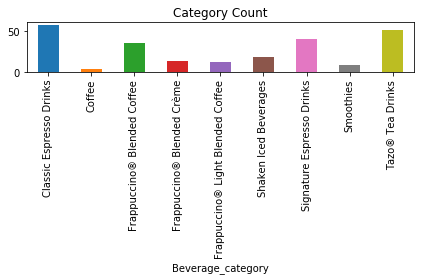

In [15]:
data_df.groupby('Beverage_category')['Beverage'].count().plot(kind='bar')
plt.title('Category Count')
plt.tight_layout()

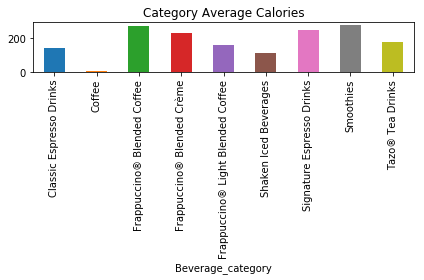

In [16]:
data_df.groupby('Beverage_category')['Calories'].mean().plot(kind='bar')
plt.title('Category Average Calories')
plt.tight_layout()

```python

"""
    明确任务：比较咖啡厅菜单各饮品类型的产品数量，平均热量
"""
import os
import pandas as pd
import matplotlib.pyplot as plt

datafile_path = './data_pd/coffee_menu.csv'

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    data_df = pd.read_csv(datafile_path)
    return data_df


def inspect_data(data_df):
    """
        查看数据
    """
    print('数据一共有{}行，{}列'.format(data_df.shape[0], data_df.shape[1]))

    print('数据预览：')
    print(data_df.head())

    print('数据基本信息：')
    print(data_df.info())

    print('数据统计信息：')
    print(data_df.describe())


def analyze_data(data_df):
    """
        数据分析
    """
    beverage_category_col = data_df['Beverage_category']
    beverage_categories = beverage_category_col.unique()
    print('饮品类别：')
    print(beverage_categories)

    catetogry_grouped = data_df.groupby('Beverage_category')
    category_count = catetogry_grouped['Calories'].count()
    category_mean_calories = catetogry_grouped['Calories'].mean()

    return category_count, category_mean_calories


def save_and_show_results(category_count, category_mean_calories):
    """
        结果展示
    """
    category_count.to_csv(os.path.join(output_path, 'category_count.csv'))
    category_mean_calories.to_csv(os.path.join(output_path, 'category_mean_calories.csv'))

    category_count.plot(kind='bar')
    plt.title('Category Count')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'category_count.png'))

    category_mean_calories.plot(kind='bar')
    plt.title('Category Average Calories')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'category_mean_calories.png'))


def main():
    """
        主函数
    """
    # 数据获取
    data_df = collect_data()

    # 查看数据信息
    inspect_data(data_df)

    # 数据分析
    category_count, category_mean_calories = analyze_data(data_df)

    # 结果展示
    save_and_show_results(category_count, category_mean_calories)


if __name__ == '__main__':
    main()
```